<center> <h1> Unit 8 Homework</h1>
<h3> W203 Statistics for Data Science </h3></center>

<center>Student Name: SUHAS GUPTA</center>

<center>Section Number: 7</center>

**Data:** The file GPA1.RData contains data from a 1994 survey of MSU students.  The survey was conducted by Christopher Lemmon, a former MSU undergraduate, and provided by Wooldridge.

** Context: ** The skipped variable represents the average number of lectures each respondent skips per week.  You are interested in testing whether MSU students skip over 1 lecture per week on the average.

**1.0: ** Examine the skipped variable and argue whether or not a t-test is valid for this scenario.

Number of rows in dataset:

[1] 141

Quick glance at data in the GPA1 dataset:

age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,⋯,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
21,0,0,1,0,0,0,1,0,3.0,⋯,0,1,1,0,0,2,1.0,1,0,0
21,0,0,1,0,0,0,1,0,3.4,⋯,0,1,0,1,1,0,1.0,1,1,1
20,0,1,0,0,0,0,1,0,3.0,⋯,0,1,1,0,1,0,1.0,1,1,1
19,1,0,0,0,1,1,1,0,3.5,⋯,0,0,1,0,0,0,0.0,0,0,0
20,0,1,0,0,0,0,1,0,3.6,⋯,0,1,1,1,0,0,1.5,1,1,0
20,0,0,1,0,1,1,1,0,3.0,⋯,0,1,1,0,0,0,0.0,0,1,0


Summary of data in variable 'skipped':

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.076   2.000   5.000 

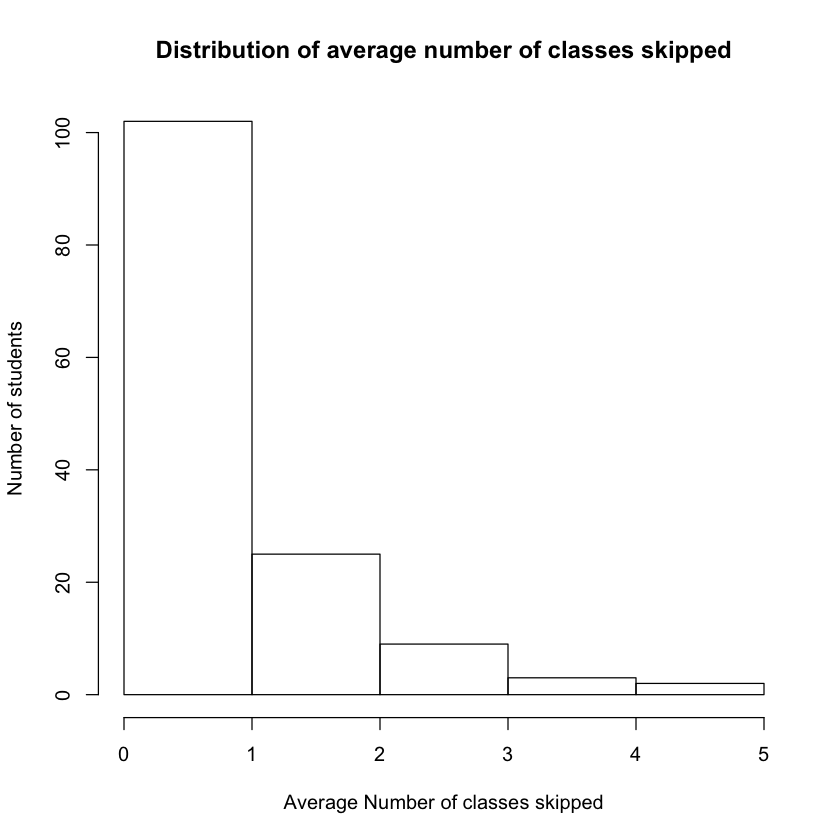

In [1]:
load("gpa1.Rdata")
cat("Number of rows in dataset:")
nrow(data)
cat("Quick glance at data in the GPA1 dataset:")
head(data)
cat("Summary of data in variable 'skipped':")
summary(data$skipped)
hist(data$skipped,breaks=5, main="Distribution of average number of classes skipped",
     xlab="Average Number of classes skipped", ylab="Number of students")

 
 <span style="color:blue">
The degrees of freedom for the ***'skipped'*** variable are 140 (>30). Even though the sample data has a negative skew, the skewness is not extreme.The CLT is fairly robust unless there is exterme skew in the sample data. If we assume that the survey was conducted in a manner that individual responses were independent of each other and random students were selected for the survey then we can apply the central limit theorem in this case. Hence, even though the sample data is not normal we can use the CLT approximation to apply the t-test for the variable ***skipped***.
</span>

**2.0: ** How would your answer to part a change if Mr. Lemmon selected dormitory rooms at random, then interviewed all occupants in the rooms he selected?

 <span style="color:blue">
If one or more students in a room are skipping classes, then the other occupants of the same dorm are likely to skip classes as well. Thus, in this case a t-test may not be a valid test for hypothesis testing of classes skipped.

In this case, the responses of students are highly likely to be dependant on each other. This could be the effect of clustering where observations from a closed group would tend to be similar. Such clustering could lead to artificially high p-values leading us to incorrectly reject the null hypothesis. 
</span>

**3.0: ** Provide an argument for why you should choose a 2-tailed test in this instance, even if you are hoping to demonstrate that MSU students skip more than 1 lecture per week.

<span style="color:blue">
Even though we are interested in testing whether the number of skipped classes is greater than 1 for MSU students, a two tailed test is still a better choice than a one-tailed test. This test has a symmetric effect on the variable being tested without specifying whether it is positive or negative.  Using a two tailed test prevents us from looking at the data and then basing the alternative hypothesis on the basis of whether the statistic is positive or negative. In classical statistical inference, we should state the null and alternate hypothesis before looking at the data.
</span>

**4.0: ** Conduct the t-test using the t.test function and interpret every component of the results.

In [1]:
t.test(data$skipped,mu=1,alternative='two.sided',conf.level=0.95)

ERROR: Error in data$skipped: object of type 'closure' is not subsettable



**Interpretation of output from t.test function**

<span style="color:blue">
    
1. "One Sample t-test" says that the t-test is performed for a single sample.

2. $ t = 0.83142 $  is the $ t_{score} $ which leads to a statistically insignificant  $ p_{value} = 0.4072 ( > \alpha=0.05) $. Based on this we fail to reject the null hypothesis that the mean of skipped classes = 1.

3. $ df = 140 $ is the degrees of freedom in the sample data ($ df = n - 1 $)

3. $ p_{value} $ gives the tail probabilities to the left and right of the $t_{score}$ on a t-distribution curve with $df$ degrees of freedom

4. Alternate hypothesis: Alternate to the NULL hypothesis $\mu_{skipped}=1$ for the two tailed t-test

5. 95% confidence interval: Upper and lower limits of the the 95% confidence interval with the above t-distribution on the sample data.

6. Mean of x : Mean of the sample data
</span>

<span style="color:blue">

If we were to run the one-tailed t-test, we would get a lower p-value (higher statistical significance) as shown below. However, this is not acceptable since we should form our hypothesis before looking at the data.

</span>

In [3]:
t.test(data$skipped,mu=1,alternative="greater")


	One Sample t-test

data:  data$skipped
t = 0.83142, df = 140, p-value = 0.2036
alternative hypothesis: true mean is greater than 1
95 percent confidence interval:
 0.9244027       Inf
sample estimates:
mean of x 
 1.076241 


**5.0: ** Show how you would compute the t-statistic and p-value manually (without using t.test), using the pt function in R.

In [4]:
x_bar = mean(data$skipped)
mu_0  = 1.0
x_sd = sd(data$skipped)
n = length(data$skipped)
df = n-1
t_score = sqrt(length(data$skipped))*(x_bar-mu_0)/x_sd
p_value = 2*pt(-t_score,df=df)

sprintf("t-statistics for skipped: %.3f", t_score)
sprintf("p value : %.3f", p_value)

[1] "t-statistics for skipped: 0.831"

[1] "p value : 0.407"

**6.0: ** Construct a 99% confidence interval for the mean number classes skipped by MSU students in a week.

In [5]:
alpha = 0.99 
tile = 1-(1-alpha)/2
t_crit = qt(tile, df=df)

serr = t_crit *  x_sd /sqrt(n)

lower_limit = x_bar - serr
upper_limit = x_bar + serr 

sprintf("99%% confidence interval for mean of skipped: [%f,%f]", lower_limit,upper_limit)


[1] "99% confidence interval for mean of skipped: [0.836774,1.315708]"

** 7.0: ** Can you say that there is a 99% chance the population mean falls inside your confidence interval?

<span style="color:blue">
No, the frequentist statistical approach doesn't give probability of a hypothesis. A 95% confidence interval doesn't give the probability of statistic falling inside the interval. It only says that if a large number of random samples were collected from the population then the mean will lie in this interval 95% of the time.
</span>